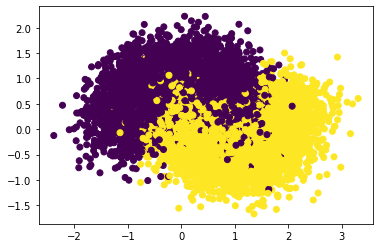

In [147]:
from sklearn.datasets import make_moons
from matplotlib.pyplot import scatter
from sklearn.model_selection import train_test_split
DATA_SIZE = 10000
NOISE = 0.4
RAND_SEED = 42
TRAIN_SIZE = 0.7
X, Y = make_moons(n_samples=DATA_SIZE, noise=NOISE,random_state=RAND_SEED)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=TRAIN_SIZE, random_state=RAND_SEED)

scatter(X[:,0], X[:,1], marker='o', c=Y)



In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
# (WITHOUT CV SEARCH) The 80% model depth 34
# The 80% model n_leaves 1117
# Bacause the max_depth = 10, max_leaf_nodes=30. We will try to search around 10, 30
# Final answer: max_depth = 8. max_lead_nodes = 36

clf = DecisionTreeClassifier()

opt_clf = GridSearchCV(clf,{"max_depth":range(1,20), "max_leaf_nodes":range(20,40)}, cv=5)

opt_clf.fit(X_train, Y_train)
print(opt_clf.best_params_)
print(opt_clf.best_params_)
# print(opt_clf.cv_results_)

{'max_depth': 8, 'max_leaf_nodes': 36}
{'max_depth': 8, 'max_leaf_nodes': 36}


In [166]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import numpy

OPTIMIZED_DEPTH = 8
OPTIMIZED_MAX_LEAF = 36
final_clf = DecisionTreeClassifier(max_depth=OPTIMIZED_DEPTH, max_leaf_nodes=OPTIMIZED_MAX_LEAF)
final_clf.fit(X_train, Y_train)


Y_train_predict = final_clf.predict(X_train)
print("THE Train F1 score {}".format(f1_score(Y_train, Y_train_predict)))
print("THE Train MEAN CV F1 score {}".format(numpy.mean(cross_val_score(clf, X_train, Y_train, cv=5, scoring="f1"))))
print("LOLLLLL THIS NOOB IS OVERFITTING A BIT ")
# print(clf.get_depth())
# print(clf.get_n_leaves())
# clf.get_params()



THE Train F1 score 0.8784654158499019
THE Train MEAN CV F1 score 0.8021414465993196
LOLLLLL THIS NOOB MODEL IS SUPER OVER FITTING LOL 


In [167]:
#THE FINAL TEST SCOREEE
Y_test_predict = final_clf.predict(X_test)
print("THE TEST F1 score {}".format(f1_score(Y_test, Y_test_predict)))


THE TEST F1 score 0.854660875375877
